# Introducing Support Vector Machines

- Good for both linear and nonlinear classification and regression on small to medium-sized datasets

Idea: Find widest possible street separating two classes: *large margin classification*

<img src="svm1.png" alt="SVM" style="width:550px;"/>

- Decision boundary fully determined by instances on the edge of the street
- These are the *support vectors*

Note: Sensitive to feature scale:

<img src="svm2.png" alt="SVM" style="width:550px;"/>


## Hard vs. Soft Margin Classification

- Hard margins are sensitive to outliers
    - Could result in no model possible
    - Or overly narrow street
    - Need to allow some margin violations!
    
<img src="svm3.png" alt="SVM" style="width:550px;"/>


## Classifier Objective Functions

Our basic decision function is

$$
s = \mathbf{w}^T \mathbf{x} + b = w_1 x_1 + ... + w_n x_n + b
$$

Consider the simple decision function $s = w_1 x_1$, and let the borders of the street be $s = -1$ and $s = 1$. Then, we can visualize the margin widths:

<img src="svm7.png" alt="SVM" style="width:500px;"/>

*Smaller* weights yield a *wider margin*. Thus, our goal is to minimize the weights. However, we must also avoid margin violations. Therefore, we define

$$
t^{(i)} = 1 \text{ for } y^{(i)} = 1
$$
$$
t^{(i)} = -1 \text{ for } y^{(i)} = 0
$$

And to avoid a margin violation, we must have $s > 1$ for all positive training instances, and $s < -1$ for all negative training instances. We can define our constraint for avoiding margin violations as

$$
t^{(i)}s^{(i)} = t^{(i)} (\mathbf{w}^T \mathbf{x} + b) \geq 1 \text{ for } i=1,...,m
$$


### Hard Margin Classification

Our hard margin classifier objective is to minimize:

$$
\frac{1}{2} \mathbf{w}^T \mathbf{w}
$$

Subject to
$$
t^{(i)}s^{(i)} = t^{(i)} (\mathbf{w}^T \mathbf{x} + b) \geq 1 \text{ for } i=1,...,m
$$

### Soft Margin Classification

For soft margin classification, we introduce *slack variables*, $\zeta^{(i)} \geq 0$. We use the hyperparameter $c$ and our objective is to minimize:

$$
\frac{1}{2} \mathbf{w}^T \mathbf{w} + c \sum_{i=1}^m \zeta^{(i)}
$$

Subject to
$$
t^{(i)}s^{(i)} = t^{(i)} (\mathbf{w}^T \mathbf{x} + b) \geq 1 - \zeta^{(i)} \text{ for } i=1,...,m
$$

We can use (stochastic) gradient descent and either the **hinge loss** or **squared hinge loss** functions to train.

<img src="svm8.png" alt="SVM" style="width:500px;"/>

## Polynomial Features, Similarity Features, and the Kernel Trick

- If our data is not linearly separable, we can add features. Two common choices:

1. Polynomial features
2. Gaussian RBF

An alternative to explicitly adding features that is more efficient is the "kernel trick." We will not cover the mathematics in detail here.

<img src="svm5.png" alt="SVM" style="width:500px;"/>

<img src="svm6.png" alt="SVM" style="width:500px;"/>

## Demo of SVM Classification

We'll use the venerable iris dataset

Our options for SVM Classification:

1. `LinearSVC`
2. `SGDClassifier`
3. `SVC`: Supports kernel trick

In [10]:
#Get our basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
#Colormap we'll use:

from matplotlib.colors import ListedColormap
my_cmap = (ListedColormap(["red", "blue"]))

In [132]:
##Let's make a function to plot our decision surface:
######

def plot_contour(X, clf, ax):
    #Range for contour:
    x1 = np.min(X[:,0]); x2 = np.max(X[:,0])*1.025
    y1 = np.min(X[:,1]); y2 = np.max(X[:,1])*1.025

    if (x1 < 0):
        x1 = x1 * 1.025
    else:
        x1 = x1 * .975
        
    if (y1 < 0):
        y1 = y1 * 1.025
    else:
        y1 = y1 * .975
        
    #Points for contour
    X1, Y1 = np.meshgrid(np.linspace(x1, x2, 200),
                             np.linspace(y1, y2, 200))

    #Get as Nx2:
    XY_ravel = np.c_[X1.ravel(), Y1.ravel()]


    #Get the class:
    Z = clf.predict(XY_ravel)

    #Reshape back:
    Z = Z.reshape(X1.shape)


    #Plot:
    ax.contourf(X1, Y1, Z, 10, alpha=.5, cmap=my_cmap)

    ax.contour(X1, Y1, Z, 1, alpha=1, linewidths=1, colors='black')


In [171]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures


In [172]:
#iris data
iris = datasets.load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [173]:
## Our feature names?
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [174]:
#Get petal length (cm) and petal width (cm)
X = iris["data"][:, [2,3]]

X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [175]:
## Classify as setosa vs. not setosa:
y = (iris["target"] == 1).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [176]:
#Alternative:
#Just use the Moons Data
#######
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=.15, random_state=42)


In [177]:
#Use a pipeline to scale and fit/transform:
#########

svm_linear_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=42))])

svm_linear_clf.fit(X, y)

C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

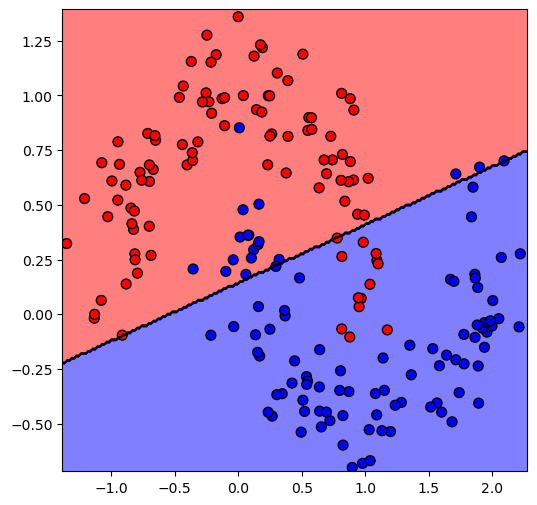

In [178]:
#Plot the decision surface:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,6))

plot_contour(X, svm_linear_clf, ax1)
ax1.scatter(X[:,0], X[:,1], c=y, edgecolor='black', s=50, cmap=my_cmap);

In [182]:
## Linear SVC with polynomial features:
#######

svm_linear_poly_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=10, loss="hinge", random_state=42))])

svm_linear_poly_clf.fit(X, y)


C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge', random_state=42))])

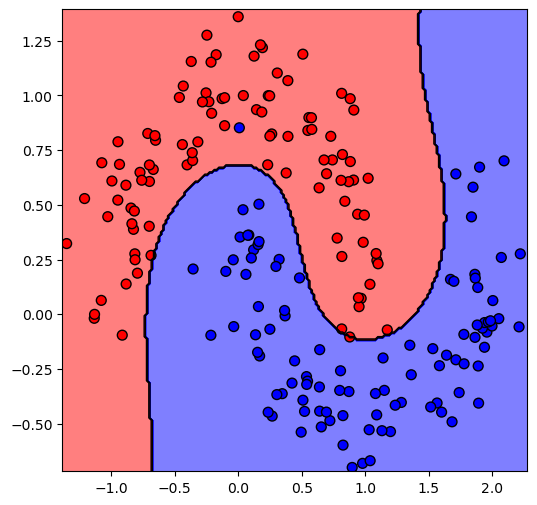

In [183]:
#Plot the decision surface:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,6))

plot_contour(X, svm_linear_poly_clf, ax1)
ax1.scatter(X[:,0], X[:,1], c=y, edgecolor='black', s=50, cmap=my_cmap);

In [195]:
## How about a nonlinear SVM:
#########

svm_nonlinear_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("nonlinear_svc", SVC(kernel='poly', degree=3, gamma='scale', coef0=1, C=10, random_state=42))])

svm_nonlinear_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('nonlinear_svc',
                 SVC(C=10, coef0=1, kernel='poly', random_state=42))])

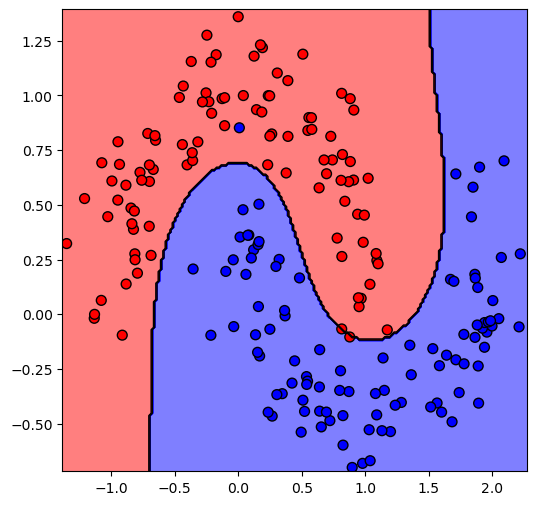

In [196]:
#Plot the nonlinear decision surface:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,6))

plot_contour(X, svm_nonlinear_clf, ax1)
ax1.scatter(X[:,0], X[:,1], c=y, edgecolor='black', s=50, cmap=my_cmap);